<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, ~~extra words in the `star_rating` column~~, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

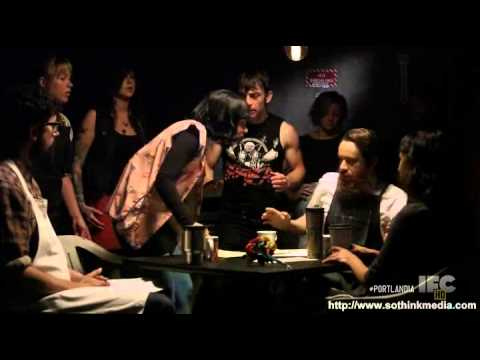

In [37]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [38]:
%pwd

'/home/regina/Desktop/DS-Unit-4-Sprint-1-NLP/module1-text-data'

In [39]:
import pandas as pd

# url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/master/module1-text-data/data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv('~/Desktop/DS-Unit-4-Sprint-1-NLP/module1-text-data/data/yelp_coffeeshop_review_data.csv')

shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


### Clean up star rating column

In [40]:
# look at star rating column
shops['star_rating'].value_counts()

 5.0 star rating     3780
 4.0 star rating     2360
 3.0 star rating      738
 2.0 star rating      460
 1.0 star rating      278
Name: star_rating, dtype: int64

In [41]:
# clean up star rating column - remove words
clean_shops = shops
clean_shops['star_rating'] = clean_shops['star_rating'].apply(lambda x: x.strip('star rating'))
clean_shops['star_rating'] = clean_shops['star_rating'].apply(lambda x: x.strip('.0'))
clean_shops['star_rating'].value_counts()

5    3780
4    2360
3     738
2     460
1     278
Name: star_rating, dtype: int64

In [42]:
clean_shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4


### Clean up text review column

In [43]:
# look at full review text column
clean_shops['full_review_text'].describe()

count                                                  7616
unique                                                 6915
top        10/12/2016 1 check-in Checked out The Factory...
freq                                                      4
Name: full_review_text, dtype: object

In [46]:
# cleaning review column
import re

def letters(text):
    text =  re.sub('[^a-zA-Z ]', '', text)
    text =  re.sub('\s+', ' ', text)
    text =  re.sub('^\s', '', text)
    return text

In [47]:
clean_shops['full_review_text'] = clean_shops['full_review_text'].apply(letters)

In [48]:
clean_shops['full_review_text'].head()

0    checkin Love love loved the atmosphere Every c...
1    Listed in Date Night Austin Ambiance in Austin...
2    checkin Listed in Brunch Spots I loved the ecl...
3    Very cool decor Good drinks Nice seating Howev...
4    checkin They are located within the Northcross...
Name: full_review_text, dtype: object

In [49]:
'''
run the tokenize function from lecture here - then see if I need to clean anything else up
'''

def tokenize(text):
    """Parses a string into a list of semantic units (words)

    Args:
        text (str): The string that the function will tokenize.

    Returns:
        list: tokens parsed out by the mechanics of your choice
    """
    # Can also use [^\w\s]
#     tokens = re.sub('[^a-zA-Z ]', '', text)
#     tokens = tokens.lower().split()

    return letters(text).lower().split()

In [50]:
# run the tokenize function on the review column

clean_shops['tokens'] = clean_shops['full_review_text'].apply(tokenize)

In [51]:
clean_shops['tokens'].head()

0    [checkin, love, love, loved, the, atmosphere, ...
1    [listed, in, date, night, austin, ambiance, in...
2    [checkin, listed, in, brunch, spots, i, loved,...
3    [very, cool, decor, good, drinks, nice, seatin...
4    [checkin, they, are, located, within, the, nor...
Name: tokens, dtype: object

In [52]:
# looking at the changes
clean_shops[['full_review_text', 'tokens']][:10]

,full_review_text,tokens
0,checkin Love love loved the atmosphere Every c...,"[checkin, love, love, loved, the, atmosphere, ..."
1,Listed in Date Night Austin Ambiance in Austin...,"[listed, in, date, night, austin, ambiance, in..."
2,checkin Listed in Brunch Spots I loved the ecl...,"[checkin, listed, in, brunch, spots, i, loved,..."
3,Very cool decor Good drinks Nice seating Howev...,"[very, cool, decor, good, drinks, nice, seatin..."
4,checkin They are located within the Northcross...,"[checkin, they, are, located, within, the, nor..."
5,checkin Very cute cafe I think from the moment...,"[checkin, very, cute, cafe, i, think, from, th..."
6,checkins Listed in Nuptial Coffee Bliss Anders...,"[checkins, listed, in, nuptial, coffee, bliss,..."
7,checkins Love this place stars for cleanliness...,"[checkins, love, this, place, stars, for, clea..."
8,checkin Ok lets try this approach Pros Music S...,"[checkin, ok, lets, try, this, approach, pros,..."
9,checkins This place has been shown on my socia...,"[checkins, this, place, has, been, shown, on, ..."


## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

In [53]:
# Base
from collections import Counter
import re
 
import pandas as pd

# Plotting
import squarify
import matplotlib.pyplot as plt
import seaborn as sns

# NLP Libraries
import spacy
from spacy.tokenizer import Tokenizer
from nltk.stem import PorterStemmer

In [54]:
# count the most used words
word_counts = Counter()
clean_shops['tokens'].apply(lambda x: word_counts.update(x))

# Print out the 10 most common words
word_counts.most_common(10)

[('the', 34809),
 ('and', 26651),
 ('a', 22756),
 ('i', 20249),
 ('to', 17164),
 ('of', 12600),
 ('is', 11999),
 ('coffee', 10354),
 ('was', 9707),
 ('in', 9546)]

In [55]:
# star rating count
clean_shops['star_rating'].value_counts(normalize=True)[:50]

5    0.496324
4    0.309874
3    0.096901
2    0.060399
1    0.036502
Name: star_rating, dtype: float64

In [56]:
# counts function from lecture
def count(docs):
    '''
    fuction which takes a corpus of document and returns and dataframe
    of word counts for us to analyze.
    '''

    word_counts = Counter()
    appears_in = Counter()

    total_docs = len(docs)

    for doc in docs:
        word_counts.update(doc)
        appears_in.update(set(doc))

    temp = zip(word_counts.keys(), word_counts.values())

    wc = pd.DataFrame(temp, columns = ['word', 'count'])

    wc['rank'] = wc['count'].rank(method='first', ascending=False)
    total = wc['count'].sum()

    wc['pct_total'] = wc['count'].apply(lambda x: x / total)

    wc = wc.sort_values(by='rank')
    wc['cul_pct_total'] = wc['pct_total'].cumsum()

    t2 = zip(appears_in.keys(), appears_in.values())
    ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
    wc = ac.merge(wc, on='word')

    wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)

    return wc.sort_values(by='rank')

In [57]:
# Use the Function
wc = count(clean_shops['tokens'])
wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
24,the,6847,34809,1.0,0.045412,0.045412,0.899028
54,and,6864,26651,2.0,0.034769,0.080180,0.901261
46,a,6246,22756,3.0,0.029687,0.109868,0.820116
23,i,5532,20249,4.0,0.026417,0.136284,0.726366
64,to,5653,17164,5.0,0.022392,0.158676,0.742253


## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


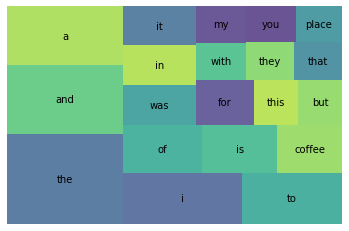

In [58]:
wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [59]:
nlp = spacy.load("en_core_web_lg")

# Tokenizer
tokenizer = Tokenizer(nlp.vocab)

In [60]:
# start with stop-words
# from lecture

tokens = []

for doc in nlp.pipe(clean_shops['full_review_text']):
    
    doc_tokens = []
    '''
    Gets a list of words that are not stop_words or punctuation.
    Also will lowercase them
    '''
    for token in doc:
        if (token.is_stop == False) \
        & (token.is_punct == False):
#         & (re.match('^\s*$', str(token)) == None):
            doc_tokens.append(token.text.lower())
            
    tokens.append(doc_tokens)
    
#save to df
clean_shops['tokens'] = tokens

In [61]:
clean_shops['tokens'].head()

0    [checkin, love, love, loved, atmosphere, corne...
1    [listed, date, night, austin, ambiance, austin...
2    [checkin, listed, brunch, spots, loved, eclect...
3    [cool, decor, good, drinks, nice, seating, ove...
4    [checkin, located, northcross, mall, shopping,...
Name: tokens, dtype: object

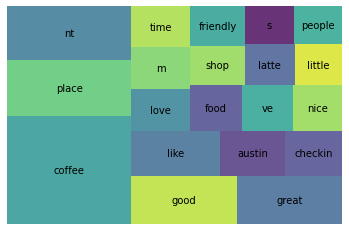

In [62]:
wc = count(clean_shops['tokens'])

wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [71]:
# add to stop-word list
STOP_WORDS = nlp.Defaults.stop_words.union(['coffee','place', 'like', 'shop', 'austin', 'nt', 'm', 's', 've', 'checkin', 'ive', 'im', 'come', 'got'])

In [72]:
tokens = []

for doc in tokenizer.pipe(clean_shops['full_review_text'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc: 
        if token.text.lower() not in STOP_WORDS:
            doc_tokens.append(token.text.lower())
   
    tokens.append(doc_tokens)
    
clean_shops['tokens'] = tokens

In [73]:
wc = count(clean_shops['tokens'])
wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
154,good,2788,3973,1.0,0.012039,0.012039,0.366071
119,great,2836,3919,2.0,0.011875,0.023913,0.372374
32,love,1500,1935,3.0,0.005863,0.029777,0.196954
483,time,1469,1884,4.0,0.005709,0.035485,0.192883
321,food,1365,1836,5.0,0.005563,0.041049,0.179228


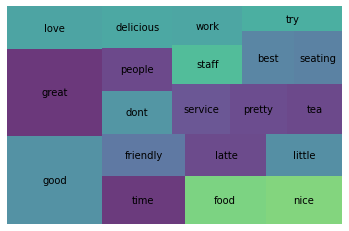

In [74]:
wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [75]:
clean_shops['star_rating'].value_counts()

5    3780
4    2360
3     738
2     460
1     278
Name: star_rating, dtype: int64

In [76]:
# lemmas
# function from lecture

def get_lemmas(text):

    lemmas = []
    
    doc = nlp(text)
    
    for token in doc: 
        if ((token.is_stop == False) and (token.is_punct == False)) and (token.pos_ != 'PRON'):
            lemmas.append(token.lemma_)
    
    return lemmas

In [77]:
clean_shops['lemmas'] = clean_shops['full_review_text'].apply(get_lemmas)

In [78]:
clean_shops['lemmas'].head()

0    [checkin, Love, love, love, atmosphere, corner...
1    [list, Date, Night, Austin, Ambiance, Austin, ...
2    [checkin, list, Brunch, Spots, love, eclectic,...
3    [cool, decor, good, drink, nice, seating, over...
4    [checkin, locate, Northcross, mall, shopping, ...
Name: lemmas, dtype: object

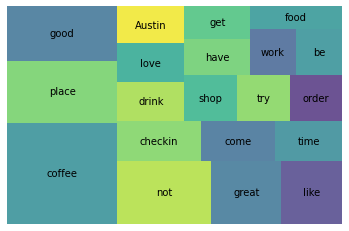

In [79]:
wc = count(clean_shops['lemmas'])
wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

## Not sure why the code above contains stop words and capitalization.....?

In [80]:
list(clean_shops)

['coffee_shop_name', 'full_review_text', 'star_rating', 'tokens', 'lemmas']

In [82]:
# scatter plot(plotly) of top words, text review = Y, avg review rating = X
# need to import plotly

# make a subset of the df
shops_anaylze = clean_shops[['lemmas', 'full_review_text', 'star_rating',]]

In [83]:
# return row into a pandas series
shops_a2 = shops_anaylze['lemmas'].apply(pd.Series) \
    .merge(shops_anaylze, right_index = True, left_index = True) \
    .drop(['lemmas'], axis=1) \
    .melt(id_vars = ['full_review_text', 'star_rating'], value_name = 'lemma')

In [84]:
# drop rows with NaNs
shops_a2 = shops_a2.dropna(axis=0)
shops_a2.head()

,full_review_text,star_rating,variable,lemma
0,checkin Love love loved the atmosphere Every c...,5,0,checkin
1,Listed in Date Night Austin Ambiance in Austin...,4,0,list
2,checkin Listed in Brunch Spots I loved the ecl...,4,0,checkin
3,Very cool decor Good drinks Nice seating Howev...,2,0,cool
4,checkin They are located within the Northcross...,4,0,checkin


In [85]:
# get the average and get the mean
shops_a2 = shops_a2.groupby('lemma').mean()

# see nax and min
shops_a2.describe()

DataError: No numeric types to aggregate

## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

